<a href="https://colab.research.google.com/github/angelbabu123/my-first-project/blob/main/amazon%20deliver%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving amazon_delivery.csv to amazon_delivery.csv


In [3]:
import pandas as pd

df = pd.read_csv('amazon_delivery.csv')
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
# ============================================================
# STEP 1 + STEP 2 + STEP 3
# DATA PREPARATION + CLEANING + FEATURE ENGINEERING
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos, asin, sqrt

# Load dataset (after uploading)
df = pd.read_csv("amazon_delivery.csv")

# -------- Basic Cleaning --------
df.columns = [c.strip() for c in df.columns]

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Order_Time'] = df['Order_Time'].astype(str).str.strip()
df['Pickup_Time'] = df['Pickup_Time'].astype(str).str.strip()

df['Order_Datetime'] = pd.to_datetime(df['Order_Date'].dt.strftime("%Y-%m-%d") + " " + df['Order_Time'], errors='coerce')
df['Pickup_Datetime'] = pd.to_datetime(df['Order_Date'].dt.strftime("%Y-%m-%d") + " " + df['Pickup_Time'], errors='coerce')

# Fix overnight pickup
mask = df['Pickup_Datetime'] < df['Order_Datetime']
df.loc[mask, 'Pickup_Datetime'] += pd.Timedelta(days=1)

# Convert numerics
num_cols = ['Agent_Age','Agent_Rating','Delivery_Time',
            'Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Standardize categorical
cat_cols = ['Weather','Traffic','Vehicle','Area','Category']
for col in cat_cols:
    df[col] = df[col].astype(str).str.title()

# Remove duplicates
df = df.drop_duplicates()

# Remove missing target rows
df = df.dropna(subset=['Delivery_Time'])

# -------------------------------
# FEATURE ENGINEERING
# -------------------------------

# Haversine function to calculate distance (km)
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

# Calculate distance
df['distance_km'] = df.apply(lambda row: haversine(
    row['Store_Longitude'], row['Store_Latitude'],
    row['Drop_Longitude'], row['Drop_Latitude']), axis=1)

# Pickup delay
df['pickup_delay_min'] = (df['Pickup_Datetime'] - df['Order_Datetime']).dt.total_seconds() / 60

# Time features
df['order_hour'] = df['Order_Datetime'].dt.hour
df['order_weekday'] = df['Order_Datetime'].dt.weekday
df['is_weekend'] = df['order_weekday'].isin([5,6]).astype(int)

print("Data Preparation + Cleaning + Feature Engineering Completed")
df.head()

Data Preparation + Cleaning + Feature Engineering Completed


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Area,Delivery_Time,Category,Order_Datetime,Pickup_Datetime,distance_km,pickup_delay_min,order_hour,order_weekday,is_weekend
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,Urban,120,Clothing,2022-03-19 11:30:00,2022-03-19 11:45:00,3.025149,15.0,11.0,5.0,1
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Metropolitian,165,Electronics,2022-03-25 19:45:00,2022-03-25 19:50:00,20.183530,5.0,19.0,4.0,0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Urban,130,Sports,2022-03-19 08:30:00,2022-03-19 08:45:00,1.552758,15.0,8.0,5.0,1
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Metropolitian,105,Cosmetics,2022-04-05 18:00:00,2022-04-05 18:10:00,7.790401,10.0,18.0,1.0,0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,Metropolitian,150,Toys,2022-03-26 13:30:00,2022-03-26 13:45:00,6.210138,15.0,13.0,5.0,1


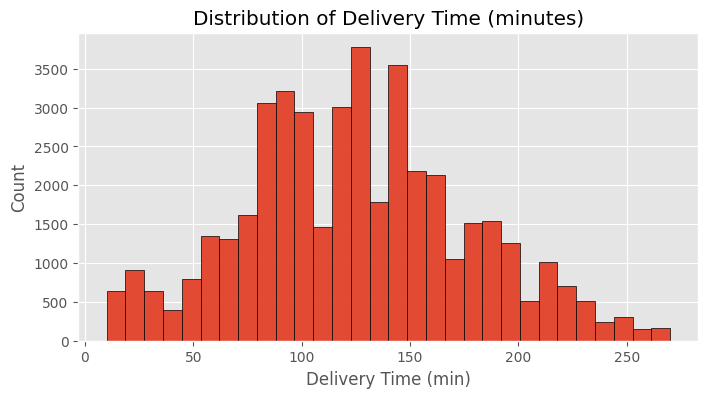

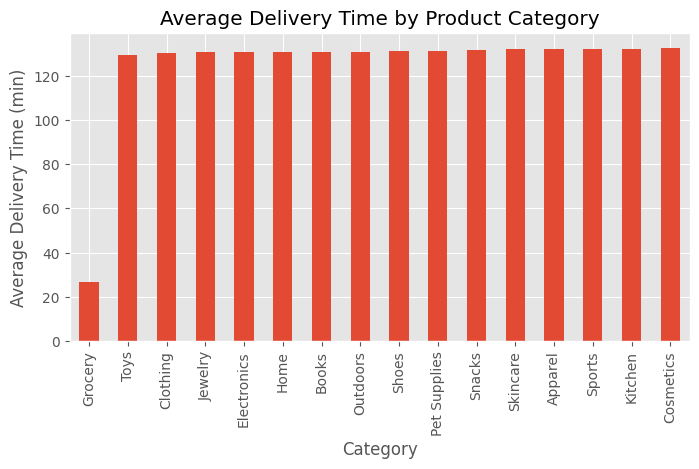

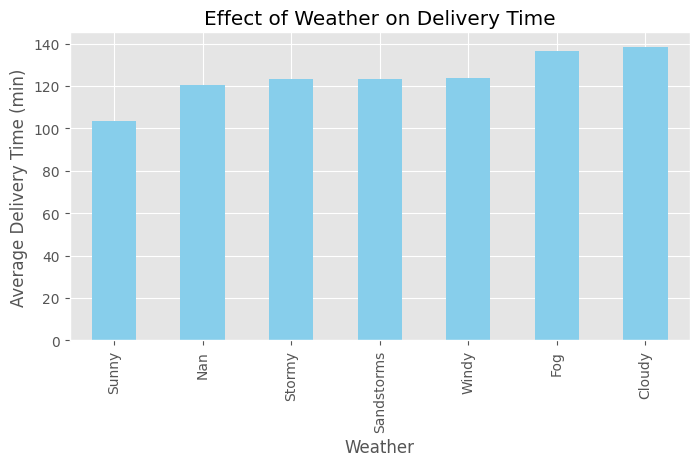

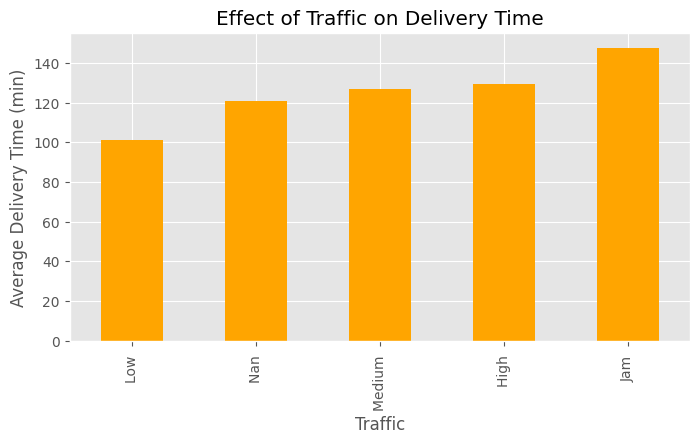

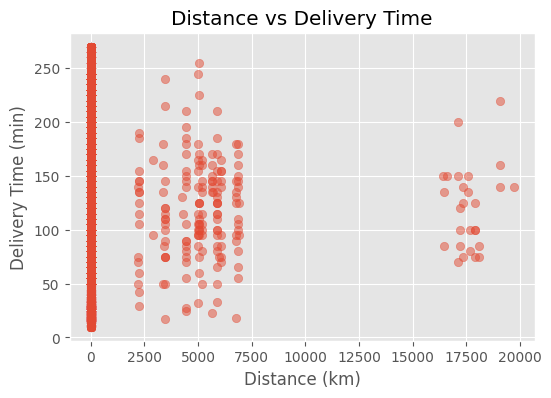

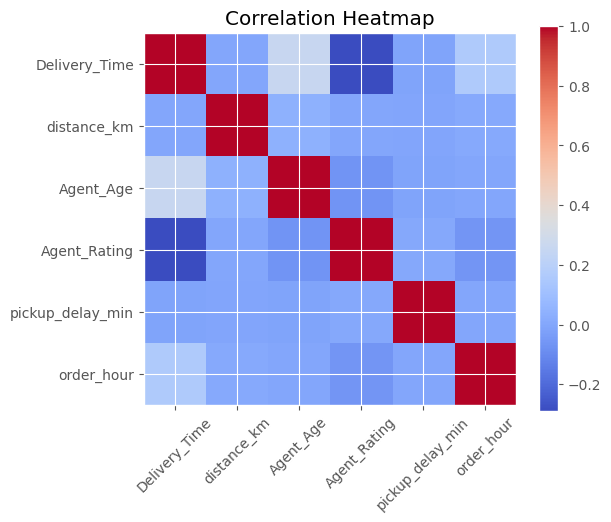

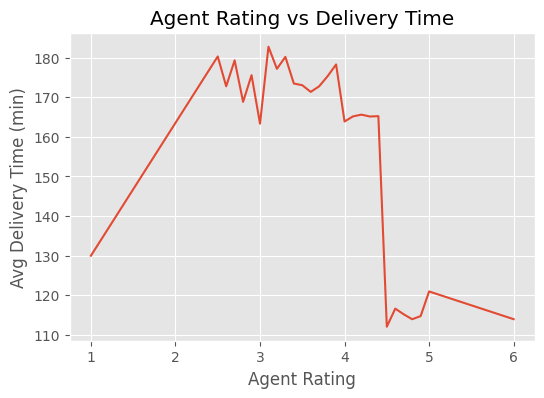

In [5]:
# ============================================================
# STEP 4 — EDA VISUALIZATIONS
# ============================================================

plt.style.use('ggplot')

# 1. Distribution of Delivery Time
plt.figure(figsize=(8,4))
plt.hist(df['Delivery_Time'], bins=30, edgecolor='black')
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Count")
plt.show()

# 2. Delivery time by Category
plt.figure(figsize=(8,4))
df.groupby("Category")['Delivery_Time'].mean().sort_values().plot(kind='bar')
plt.title("Average Delivery Time by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Delivery Time (min)")
plt.show()

# 3. Impact of Weather
plt.figure(figsize=(8,4))
df.groupby("Weather")['Delivery_Time'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title("Effect of Weather on Delivery Time")
plt.xlabel("Weather")
plt.ylabel("Average Delivery Time (min)")
plt.show()

# 4. Impact of Traffic
plt.figure(figsize=(8,4))
df.groupby("Traffic")['Delivery_Time'].mean().sort_values().plot(kind='bar', color='orange')
plt.title("Effect of Traffic on Delivery Time")
plt.xlabel("Traffic")
plt.ylabel("Average Delivery Time (min)")
plt.show()

# 5. Distance vs Delivery Time (scatter)
plt.figure(figsize=(6,4))
plt.scatter(df['distance_km'], df['Delivery_Time'], alpha=0.5)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

# 6. Correlation heatmap
numeric_cols = ["Delivery_Time","distance_km","Agent_Age","Agent_Rating","pickup_delay_min","order_hour"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap")
plt.show()

# 7. Agent performance
plt.figure(figsize=(6,4))
df.groupby("Agent_Rating")['Delivery_Time'].mean().plot()
plt.title("Agent Rating vs Delivery Time")
plt.xlabel("Agent Rating")
plt.ylabel("Avg Delivery Time (min)")
plt.show()

In [6]:
# ======================================================
# RESET + OPTIMIZED MODEL TRAINING CODE (NO FREEZING)
# ======================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import joblib

# -------------------------------------------------------
# 1. Define X and y
# -------------------------------------------------------

target = "Delivery_Time"
X = df.drop(columns=[target]).copy()
y = df[target].copy()

# Remove datetime-related columns
remove_cols = ['Order_Datetime','Pickup_Datetime','Order_Date','Order_Time','Pickup_Time']
X = X.drop(columns=[c for c in remove_cols if c in X.columns], errors="ignore")

# ❗ REMOVE Order_ID (too many unique values → OneHot huge slowdown)
if "Order_ID" in X.columns:
    X = X.drop(columns=["Order_ID"])

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)

# -------------------------------------------------------
# 2. Train/Test Split
# -------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# -------------------------------------------------------
# 3. Preprocessing
# -------------------------------------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 🔥 Use OrdinalEncoder instead of OneHot (faster for trees)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# -------------------------------------------------------
# 4. Models
# -------------------------------------------------------

models = {
    "Linear Regression": LinearRegression(),

    # 🔥 Fast RandomForest (no freezing)
    "Random Forest": RandomForestRegressor(
        n_estimators=120,
        max_depth=18,
        n_jobs=-1,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# -------------------------------------------------------
# 5. Training Loop
# -------------------------------------------------------

results = {}
best_rmse = float("inf")
best_model = None

for name, model in models.items():
    print(f"\nTraining {name}...")

    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R2  : {r2:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipeline
        best_model_name = name

# -------------------------------------------------------
# 6. Show Results
# -------------------------------------------------------

print("\n=========== MODEL PERFORMANCE ===========")
for m, r in results.items():
    print(f"\n{m}: {r}")

print("\nBest Model:", best_model_name)

# -------------------------------------------------------
# 7. Save Best Model
# -------------------------------------------------------

joblib.dump(best_model, "best_model.pkl")
print("\nSaved best model → best_model.pkl")


Categorical: ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
Numeric: ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'distance_km', 'pickup_delay_min', 'order_hour', 'order_weekday', 'is_weekend']

Training Linear Regression...
RMSE: 44.97
MAE : 34.78
R2  : 0.2408

Training Random Forest...
RMSE: 22.94
MAE : 17.81
R2  : 0.8024

Training Gradient Boosting...
RMSE: 24.19
MAE : 19.12
R2  : 0.7803

=========== MODEL PERFORMANCE ===========

Linear Regression: {'RMSE': np.float64(44.972414468992625), 'MAE': 34.778526058190714, 'R2': 0.24077882904044812}

Random Forest: {'RMSE': np.float64(22.942159388267626), 'MAE': 17.81394663208443, 'R2': 0.802419315240829}

Gradient Boosting: {'RMSE': np.float64(24.191815706243872), 'MAE': 19.122750212386812, 'R2': 0.7803087136997475}

Best Model: Random Forest

Saved best model → best_model.pkl


In [7]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00


In [8]:
import mlflow
import mlflow.sklearn

In [9]:
# =======================================================
# CLEAN MLflow Tracking for All Models (No Warnings)
# =======================================================

import mlflow
import mlflow.sklearn

mlflow.set_experiment("Amazon Delivery Time Prediction")

# Sample input for signature logging (first row of train data)
sample_input = X_train.head(1)

for name, model in models.items():
    print(f"\nMLflow Logging: {name}")

    with mlflow.start_run(run_name=name):

        # Full pipeline
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Log parameters
        mlflow.log_param("model_name", name)

        # Log metrics
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Log model with signature
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path=name.replace(" ", "_"),
            input_example=sample_input
        )

        print(f"Logged {name} to MLflow successfully!")


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/27 11:23:46 INFO mlflow.tracking.fluent: Experiment with name 'Amazon Delivery Time Prediction' does not exist. Creating a new experiment.



MLflow Logging: Linear Regression


2025/11/27 11:23:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Logged Linear Regression to MLflow successfully!

MLflow Logging: Random Forest


2025/11/27 11:24:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Logged Random Forest to MLflow successfully!

MLflow Logging: Gradient Boosting


2025/11/27 11:24:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Logged Gradient Boosting to MLflow successfully!


In [9]:
!pip install pyngrok


In [10]:
from pyngrok import ngrok
ngrok.set_auth_token("35R6Lq78VrFpmjie1obCX9Bagyu_3mdujZ2vT1PFw7ompE8YW")


In [11]:
# Start MLflow server
get_ipython().system_raw("mlflow ui --port 5000 &")

# Open ngrok tunnel
public_url = ngrok.connect(5000)
public_url


<NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000">

In [12]:
get_ipython().system_raw("mlflow ui --host 0.0.0.0 --port 5000 &")


In [13]:
from pyngrok import ngrok
public_url = ngrok.connect(addr="5000", proto="http")
public_url


<NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000">

In [14]:
!kill -9 $(lsof -t -i:5000)


In [15]:
import os
os.environ["MLFLOW_SERVER_ALLOWED_HOSTS"] = "*"


In [16]:
get_ipython().system_raw("mlflow server --host 0.0.0.0 --port 5000 --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlartifacts &")


In [23]:
from pyngrok import ngrok
public_url = ngrok.connect(addr="5000", proto="http")
public_url


<NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000">

In [18]:
import mlflow

mlflow.get_experiment_by_name("Amazon Delivery Time Prediction")


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


In [19]:
experiment_id = mlflow.create_experiment("Amazon Delivery Time Prediction")
experiment_id


'930796969466295420'

In [20]:
mlflow.set_experiment("Amazon Delivery Time Prediction")


<Experiment: artifact_location='file:///content/mlruns/930796969466295420', creation_time=1764268245004, experiment_id='930796969466295420', last_update_time=1764268245004, lifecycle_stage='active', name='Amazon Delivery Time Prediction', tags={}>

In [21]:
for name, model in models.items():
    ...


In [22]:
mlflow.set_experiment("Amazon Delivery Time Prediction")


<Experiment: artifact_location='file:///content/mlruns/930796969466295420', creation_time=1764268245004, experiment_id='930796969466295420', last_update_time=1764268245004, lifecycle_stage='active', name='Amazon Delivery Time Prediction', tags={}>

In [24]:
# =====================================================================
# 🚀 COMBINED MLflow FIX CODE — GOOGLE COLAB VERSION (FINAL)
# =====================================================================

import os
import mlflow
import mlflow.sklearn
from pyngrok import ngrok

# ------------------------------------------
# 1️⃣ Allow all hosts (Fix Invalid Host Header Error)
# ------------------------------------------
os.environ["MLFLOW_SERVER_ALLOWED_HOSTS"] = "*"

# ------------------------------------------
# 2️⃣ Kill any MLflow process on port 5000 (clean start)
# ------------------------------------------
!kill -9 $(lsof -t -i:5000) 2>/dev/null || echo "No process on 5000"

# ------------------------------------------
# 3️⃣ Create the MLflow experiment if not exists
# ------------------------------------------
experiment_name = "Amazon Delivery Time Prediction"

exp = mlflow.get_experiment_by_name(experiment_name)
if exp is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    print(f"Created Experiment: {experiment_name}")
else:
    experiment_id = exp.experiment_id
    print(f"Experiment already exists: {experiment_name}")

mlflow.set_experiment(experiment_name)

# ------------------------------------------
# 4️⃣ Start MLflow server (SQLite backend)
# ------------------------------------------
print("Starting MLflow server...")
get_ipython().system_raw(
    "mlflow server "
    "--backend-store-uri sqlite:///mlflow.db "
    "--default-artifact-root ./mlartifacts "
    "--host 0.0.0.0 "
    "--port 5000 &"
)

# ------------------------------------------
# 5️⃣ Start ngrok tunnel
# ------------------------------------------
print("Starting ngrok tunnel...")
public_url = ngrok.connect(addr="5000", proto="http")
print("MLflow UI Link:", public_url)

# ------------------------------------------
# 6️⃣ Log All Models to MLflow
# ------------------------------------------
sample_input = X_train.head(1)  # helps create model signature

print("\nLogging all models to MLflow...")

for name, model in models.items():

    with mlflow.start_run(run_name=name):
        print(f"\nLogging: {name}")

        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        # Metrics
        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        # Save model
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path=name.replace(" ", "_"),
            input_example=sample_input
        )

        print(f"Model '{name}' logged successfully.")

print("\n🎉 MLflow logging completed!")


Experiment already exists: Amazon Delivery Time Prediction
Starting MLflow server...
Starting ngrok tunnel...
MLflow UI Link: NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000"

Logging all models to MLflow...

Logging: Linear Regression


2025/11/27 18:35:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Model 'Linear Regression' logged successfully.

Logging: Random Forest


2025/11/27 18:36:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Model 'Random Forest' logged successfully.

Logging: Gradient Boosting


2025/11/27 18:36:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Model 'Gradient Boosting' logged successfully.

🎉 MLflow logging completed!


In [25]:
import mlflow

mlflow.get_experiment_by_name("Amazon Delivery Time Prediction")


<Experiment: artifact_location='file:///content/mlruns/930796969466295420', creation_time=1764268245004, experiment_id='930796969466295420', last_update_time=1764268245004, lifecycle_stage='active', name='Amazon Delivery Time Prediction', tags={}>

In [26]:
mlflow.set_experiment("Amazon Delivery Time Prediction")


<Experiment: artifact_location='file:///content/mlruns/930796969466295420', creation_time=1764268245004, experiment_id='930796969466295420', last_update_time=1764268245004, lifecycle_stage='active', name='Amazon Delivery Time Prediction', tags={}>

In [27]:
for name, model in models.items():
    with mlflow.start_run(run_name=name):

        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        mlflow.sklearn.log_model(pipeline, name.replace(" ", "_"))

        print(f"Logged {name}")


2025/11/27 18:40:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 18:41:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Linear Regression


2025/11/27 18:41:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 18:41:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest


2025/11/27 18:41:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 18:41:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Gradient Boosting


In [28]:
mlflow.search_experiments()


[<Experiment: artifact_location='file:///content/mlruns/930796969466295420', creation_time=1764268245004, experiment_id='930796969466295420', last_update_time=1764268245004, lifecycle_stage='active', name='Amazon Delivery Time Prediction', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1764267247002, experiment_id='0', last_update_time=1764267247002, lifecycle_stage='active', name='Default', tags={}>]

In [29]:
!kill -9 $(lsof -t -i:5000) 2>/dev/null || echo "No server running"

import os
os.environ["MLFLOW_SERVER_ALLOWED_HOSTS"] = "*"

get_ipython().system_raw(
    "mlflow server "
    "--backend-store-uri sqlite:///mlflow.db "
    "--default-artifact-root ./mlartifacts "
    "--host 0.0.0.0 "
    "--port 5000 &"
)


In [30]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
public_url


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 5 endpoints over a single ngrok agent session.\nThe endpoints already running on this session are:\ntn_364YKPNzfJPhArSBcGx2OmXn4VA, tn_364Z39tgM1s1rrN1DlFUPG2DkV8, tn_364ZOdUNLBSTQGCCBLagu4zXkic, tn_364aaKuHWvIpgxCkCeDs6ezQBDl, tn_364awudaZutgR5I8gbOjQhxueM0.\nUpgrade to a Pay-as-you-go plan at: https://dashboard.ngrok.com/billing/choose-a-plan?plan=paygo\r\n\r\nERR_NGROK_324\r\n"}}


In [31]:
# =========================================================
# ONE-CLICK MLflow + ngrok SETUP (Google Colab SAFE VERSION)
# =========================================================

import os
from pyngrok import ngrok
import mlflow

print("🔄 Resetting ngrok...")
!pkill -f ngrok 2>/dev/null
!kill -9 $(pgrep ngrok) 2>/dev/null || echo "No running ngrok processes"
!rm -rf ~/.ngrok2

print("🔐 Setting ngrok token...")
ngrok.set_auth_token("35R6Lq78VrFpmjie1obCX9Bagyu_3mdujZ2vT1PFw7ompE8YW")   # <-- PUT YOUR TOKEN

print("🚀 Starting MLflow server...")
os.environ["MLFLOW_SERVER_ALLOWED_HOSTS"] = "*"

get_ipython().system_raw(
    "mlflow server "
    "--backend-store-uri sqlite:///mlflow.db "
    "--default-artifact-root ./mlartifacts "
    "--host 0.0.0.0 "
    "--port 5000 &"
)

print("🌐 Opening ngrok tunnel...")
public_url = ngrok.connect(5000)
print("\n============================================")
print("🔥 MLflow UI is LIVE!")
print("👉 OPEN THIS LINK:")
print(public_url)
print("============================================")


🔄 Resetting ngrok...
^C
No running ngrok processes
🔐 Setting ngrok token...
🚀 Starting MLflow server...
🌐 Opening ngrok tunnel...

🔥 MLflow UI is LIVE!
👉 OPEN THIS LINK:
NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000"


In [32]:
mlflow.set_experiment("Amazon Delivery Time Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        mlflow.sklearn.log_model(pipeline, name)

        print("Logged:", name)


2025/11/27 18:51:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 18:51:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged: Linear Regression


2025/11/27 18:52:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 18:52:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged: Random Forest


2025/11/27 18:52:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 18:52:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged: Gradient Boosting


In [37]:
!kill -9 $(lsof -t -i:5000) 2>/dev/null || echo "No server running"

import os
os.environ["MLFLOW_SERVER_ALLOWED_HOSTS"] = "*"

get_ipython().system_raw(
    "mlflow server "
    "--backend-store-uri sqlite:///mlflow.db "
    "--default-artifact-root ./mlartifacts "
    "--host 0.0.0.0 "
    "--port 5000 &"
)


In [38]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
public_url


<NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000">

In [39]:
mlflow.set_experiment("Amazon Delivery Time Prediction")

for name, model in models.items():

    with mlflow.start_run(run_name=name):

        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        mlflow.sklearn.log_model(pipeline, name.replace(" ", "_"))

        print("Logged:", name)


2025/11/27 19:01:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:01:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged: Linear Regression


2025/11/27 19:02:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:02:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged: Random Forest


2025/11/27 19:02:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:02:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged: Gradient Boosting


In [48]:
# ===========================================================
# 🚀 ONE-CLICK MLflow + ngrok + Model Logging (FINAL VERSION)
# ===========================================================

import os
from pyngrok import ngrok
import mlflow
import mlflow.sklearn
import numpy as np

# ================
# 1️⃣ Reset ngrok
# ================
print("\n🔄 Resetting ngrok...")
!pkill -f ngrok 2>/dev/null
!kill -9 $(pgrep ngrok) 2>/dev/null || echo "No running ngrok processes"
!rm -rf ~/.ngrok2

# ================
# 2️⃣ Apply token
# ================
print("\n🔐 Setting ngrok token...")
ngrok.set_auth_token("35R6Lq78VrFpmjie1obCX9Bagyu_3mdujZ2vT1PFw7ompE8YW")   # <-- put your token here

# ==========================
# 3️⃣ Start MLflow server
# ==========================
print("\n🚀 Starting MLflow server...")
os.environ["MLFLOW_SERVER_ALLOWED_HOSTS"] = "*"

get_ipython().system_raw(
    "mlflow server "
    "--backend-store-uri sqlite:///mlflow.db "
    "--default-artifact-root ./mlartifacts "
    "--host 0.0.0.0 "
    "--port 5000 &"
)

# ==========================
# 4️⃣ Open ngrok tunnel
# ==========================
print("\n🌐 Opening ngrok tunnel...")
public_url = ngrok.connect(5000)
print("\n======================================")
print("🔥 MLflow UI is LIVE at:")
print(public_url)
print("======================================\n")

# ==========================
# 5️⃣ Set Experiment
# ==========================
print("📁 Setting experiment...")

mlflow.set_experiment("Amazon Delivery Time Prediction")

# ==========================
# 6️⃣ LOG ALL MODELS
# ==========================

print("\n📦 Logging models to MLflow...")

sample_input = X_train.head(1)

for name, model in models.items():
    print(f"\n➡️ Logging: {name}")

    with mlflow.start_run(run_name=name):

        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        mlflow.sklearn.log_model(
            pipeline,
            artifact_path=name.replace(" ", "_"),
            input_example=sample_input
        )

        print(f"✔ Logged {name} successfully!")

print("\n🎉 All models logged successfully!")
print("👉 Refresh the MLflow UI window now!")



🔄 Resetting ngrok...
^C
No running ngrok processes

🔐 Setting ngrok token...

🚀 Starting MLflow server...

🌐 Opening ngrok tunnel...

🔥 MLflow UI is LIVE at:
NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:5000"

📁 Setting experiment...

📦 Logging models to MLflow...

➡️ Logging: Linear Regression


2025/11/27 19:24:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


✔ Logged Linear Regression successfully!

➡️ Logging: Random Forest


2025/11/27 19:25:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


✔ Logged Random Forest successfully!

➡️ Logging: Gradient Boosting


2025/11/27 19:25:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


✔ Logged Gradient Boosting successfully!

🎉 All models logged successfully!
👉 Refresh the MLflow UI window now!


In [41]:
print(models)
print(X_train.shape)
print(y_train.shape)


{'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(max_depth=18, n_estimators=120, n_jobs=-1,
                      random_state=42), 'Gradient Boosting': GradientBoostingRegressor(random_state=42)}
(34991, 16)
(34991,)


In [42]:
mlflow.set_experiment("Amazon Delivery Time Prediction")

for name, model in models.items():

    print(f"Logging model: {name}")

    with mlflow.start_run(run_name=name):

        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        mlflow.sklearn.log_model(
            pipeline,
            artifact_path=name.replace(" ", "_")
        )

        print(f"✔ Logged: {name}")


Logging model: Linear Regression


2025/11/27 19:12:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:12:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✔ Logged: Linear Regression
Logging model: Random Forest


2025/11/27 19:13:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:13:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✔ Logged: Random Forest
Logging model: Gradient Boosting


2025/11/27 19:13:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:13:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✔ Logged: Gradient Boosting


In [44]:
!rm -rf mlruns


In [45]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")


In [46]:
mlflow.get_tracking_uri()


'sqlite:///mlflow.db'

In [47]:
mlflow.set_experiment("Amazon Delivery Time Prediction")

for name, model in models.items():

    with mlflow.start_run(run_name=name):
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)
        mlflow.log_param("model_name", name)

        mlflow.sklearn.log_model(pipeline, name.replace(" ", "_"))


2025/11/27 19:22:57 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/27 19:22:57 INFO mlflow.store.db.utils: Updating database tables
2025-11-27 19:22:57 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-27 19:22:57 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-11-27 19:22:57 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-27 19:22:57 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025/11/27 19:22:57 INFO mlflow.tracking.fluent: Experiment with name 'Amazon Delivery Time Prediction' does not exist. Creating a new experiment.
2025/11/27 19:22:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/27 19:23:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/27 19:23:37 WARNING mlflow.models.model: `

In [49]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.4 MB/s eta 0:00:00


In [51]:
from pyngrok import ngrok
ngrok.set_auth_token("35R6Lq78VrFpmjie1obCX9Bagyu_3mdujZ2vT1PFw7ompE8YW")


In [52]:
%%writefile app.py
import streamlit as st

st.title("My Streamlit App")
st.write("Your app is running successfully!")


Writing app.py


In [53]:
public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py --server.port 8501 & sleep 5





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.134.4:8501

